In [1]:
import pandas as pd
findata=pd.read_csv("financial-tweet-data-x.csv")
print(findata.keys())
sentdata=pd.read_csv("financial-tweet-data-y.csv")
print(sentdata.keys())

Index(['Positives', 'Negatives', 'Sentence'], dtype='object')
Index(['Sentiment'], dtype='object')


In [2]:
print(findata.Sentence)

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object


In [3]:
#extract the tweets
tweets = findata['Sentence']

import random as random

#show a random tweet
random.choice(tweets)

'After piloting , the instrument will be further developed according to the experiences gained .'

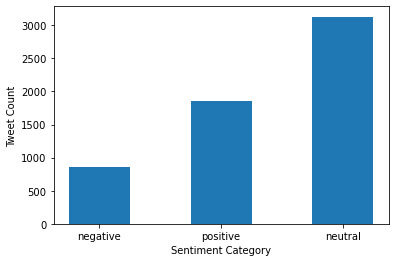

In [5]:
#plot the categorization
import numpy as np
import matplotlib.pyplot as plt

#extract the categorization
metric = sentdata['Sentiment']

category = ['positive', 'negative', 'neutral']
count = [0, 0, 0]
n = 0

for p in range(0, len(metric)):

    for n in range(len(category)):
        if (category[n]==metric[p]):
            count[n] = count[n] + 1

#sort based on counts
count, category = zip(*sorted(zip(count, category)))

index = np.arange(len(category)) + 0.3

fig, ax = plt.subplots()
plt.bar(index, count, .5)
ax.set_xticks(index, category)
plt.xlabel("Sentiment Category")
plt.ylabel("Tweet Count")

plt.show()

In [ ]:
!python -m spacy download en_core_web_md

In [6]:
import os
import sys
!{sys.executable} -m spacy info 
import time
import spacy

nlp = spacy.load('en_core_web_md')


============================== Info about spaCy ==============================

spaCy version    3.3.1                         
Location         /Users/ribells/opt/anaconda3/lib/python3.9/site-packages/spacy
Platform         macOS-10.16-x86_64-i386-64bit 
Python version   3.9.12                        
Pipelines        en_core_web_sm (3.3.0), en_core_web_md (3.3.0)



In [7]:
#load word data analysis from tweets
words = []
noun_chunks = []
entities = []
content = []

for i in range(len(tweets)):
    if i % 500 == 0:
        print(i, len(tweets))
    doc = nlp(tweets[i])
    content.append(doc)
    words.extend([w for w in list(doc) if w.is_alpha])
    noun_chunks.extend(list(doc.noun_chunks))
    entities.extend(list(doc.ents))

0 5842
500 5842
1000 5842
1500 5842
2000 5842
2500 5842
3000 5842
3500 5842
4000 5842
4500 5842
5000 5842
5500 5842


In [8]:
# from https://7esl.com/positive-words/ + financial ones
negative_words = ["Bearish", "Increase", "Increased", "Dissolved", "Bankruptcy", "Growing", "Abrasive","Apathetic","Controlling","Dishonest","Impatient","Anxious","Betrayed","Disappointed","Embarrassed","Jealous","Abysmal","Bad","Callous","Corrosive","Damage","Despicable","Don’t","Enraged","Fail","Gawky","Haggard","Hurt","Icky","Insane","Jealous","Lose","Malicious","Naive","Not","Objectionable","Pain","Questionable","Reject","Rude","Sad","Sinister","Stuck","Tense","Ugly","Unsightly","Vice","Wary","Yell","Zero","Adverse","Banal","Can’t","Corrupt","Damaging","Detrimental","Dreadful","Eroding","Faulty","Ghastly","Hard","Hurtful","Ignorant","Insidious","Junky","Lousy","Mean","Nasty","Noxious","Odious","Perturb","Quirky","Renege","Ruthless","Savage","Slimy","Stupid","Terrible","Undermine","Untoward","Vicious","Weary","Yucky","Alarming","Barbed","Clumsy","Dastardly","Dirty","Dreary","Evil","Fear","Grave","Hard-hearted","Ignore","Injure","Insipid","Lumpy","Menacing","Naughty","None","Offensive","Pessimistic","Quit","Repellant","Scare","Smelly","Substandard","Terrifying","Unfair","Unwanted","Vile","Wicked","Angry","Belligerent","Coarse","Crazy","Dead","Disease","Feeble","Greed","Harmful","Ill","Injurious","Messy","Negate","No one","Old","Petty","Reptilian","Scary","Sobbing","Suspect","Threatening","Unfavorable","Unwelcome","Villainous","Woeful","Annoy","Bemoan","Cold","Creepy","Decaying","Disgusting","Fight","Grim","Hate","Immature","Misshapen","Negative","Nothing","Oppressive","Plain","Repugnant","Scream","Sorry","Suspicious","Unhappy","Unwholesome","Vindictive","Worthless","Anxious","Beneath","Cold-hearted","Criminal","Deformed","Disheveled","Filthy","Grimace","Hideous","Imperfect","Missing","Never","Neither","Poisonous","Repulsive","Severe","Spiteful","Unhealthy","Unwieldy","Wound","Apathy","Boring","Collapse","Cruel","Deny","Dishonest","Foul","Gross","Homely","Impossible","Misunderstood","No","Nowhere","Poor","Revenge","Shocking","Sticky","Unjust","Unwise","Appalling","Broken","Confused","Cry","Deplorable","Dishonorable","Frighten","Grotesque","Horrendous","Inane","Moan","Nobody","Prejudice","Revolting","Shoddy","Stinky","Unlucky","Upset","Atrocious","Contrary","Cutting","Depressed","Dismal","Frightful","Gruesome","Horrible","Inelegant","Moldy","Nondescript","Rocky","Sick","Stormy","Unpleasant","Awful","Contradictory","Deprived","Distress","Guilty","Hostile","Infernal","Monstrous","Nonsense","Rotten","Sickening","Stressful","Unsatisfactory"]

# from https://7esl.com/negative-words/ + financial ones
positive_words = ["Bullish", "Decrease", "Decreased", "Doubled", "Shrinking", "Adaptable","Adventurous","Amazing","Amiable","Beautiful","Becoming","Beloved","Better","Best","Blessed","Blissful","Brotherly","Calming","Captivating","Charming","Cherished","Comforting","Compelling","Considerable","Credible","Dapper","Darling","Delicious","Delightful","Dependable","Desirable","Dreamy","Durable","Easier","Easy","Elegant","Empowering","Enchanting","Endearing","Energising","Enjoyable","Enlightening","Excellent","Exceptional","Fabulous","Fancy","Fantastic","Fashionable","Faultless","Fetching","Fine","Flourishing","Formidable","Fulfilling","Funny","Generous","Gifted","Glamorous","Gleaming","Glowing","Good","Godly","Gracious","Gratifying","Great","Happening","Harmonious","Heavenly","Honorable","Ideal","Important","Improved", "Incredible","Indispensable","Indisputable","Influential","Inspiring","Interesting","Irresistible","Joyful","Jolly","Jovial","Kindly","Kingly","Leading","Legendary","Liberating","Likeable","Lordly","Lovable","Luscious","Luxurious","Magical","Majestic","Memorable","Mesmerizing","Mighty","Miraculous","Motivational","Nifty","Obliging","Optimal","Original","Out of this world","Outgoing","Palatable","Paramount","Peaceful","Peachy","Perfect","Phenomenal","Picturesque","Pleasant","Pleasing","Pleasurable","Positive","Powerful","Praiseworthy","Precious","Prestigious","Prizewinning","Promising","Quality","Radiant","Reasonable","Refreshing","Reliable","Respectable","Revolutionary","Rewarding","Rousing","Saintly","Salubrious","Satisfying","Scrumptious","Sensational","Sexy","Shiny","Showy","Smashing","Soothing","Sought-after","Spectacular","Spiffy","Stimulating","Striking","Stunning","Stupendous","Superb","Supreme","Swanky","Tasteful","Tasty","Terrific","Thrilling","Titillating","Tremendous","Tremendous","Trusty","Ultimate","Unbelievable","Uplifting","Useful","Valuable","Vibrant","Wonderful"]

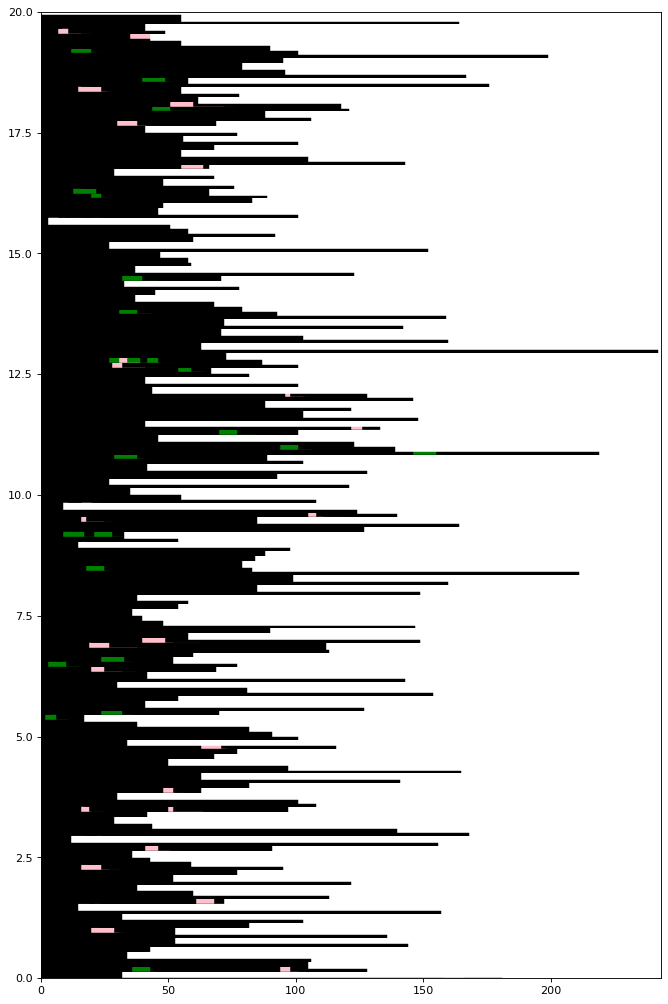

In [9]:
#visualize positive/negative words
from matplotlib.patches import Rectangle

max_x = 0
num_sentences = 200
count_positive = []
count_negative = []

#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 16), dpi=80)

for p in range(0, num_sentences):
    parsed = []
    parsed.extend([w for w in list(content[p]) if w.is_alpha])
    w_beg = 0
    w_end = 0
    
    for i in range(0, len(parsed)):
        #print(parsed[i])

        w_end = w_end + len(parsed[i])
        
        #update y axis max value
        if(w_end > max_x):
            max_x = w_end
            
        found = False
        
        for j in range(0, len(negative_words)):
            if str(parsed[i]).lower() == negative_words[j].lower():
                found = True
                color = 'pink'
                
        for j in range(0, len(positive_words)):
            if str(parsed[i]).lower() == positive_words[j].lower():
                found = True
                color = 'green'

        if found == False:
            color = 'black'

        #add rectangle to plot
        ax.add_patch(Rectangle((w_beg, (p*.1)), w_end, (p*.1)+.1, edgecolor = color,
                 facecolor = color,
                 fill=True,
                 lw=5))
        w_beg = w_end

    ax.add_patch(Rectangle((w_beg, (p*.1)-.04), 500, (p*.1)+.1, edgecolor = 'white',
             facecolor = 'white',
             fill=True,
             lw=5))

ax.add_patch(Rectangle((0, (p*.1)+.1), 500, 20, edgecolor = 'white',
         facecolor = 'white',
         fill=True,
         lw=5))

plt.xlim([0, max_x])
plt.ylim([0, num_sentences*.1])

#display plot
plt.show()

fig.savefig('weights.png', bbox_inches='tight', dpi=300)

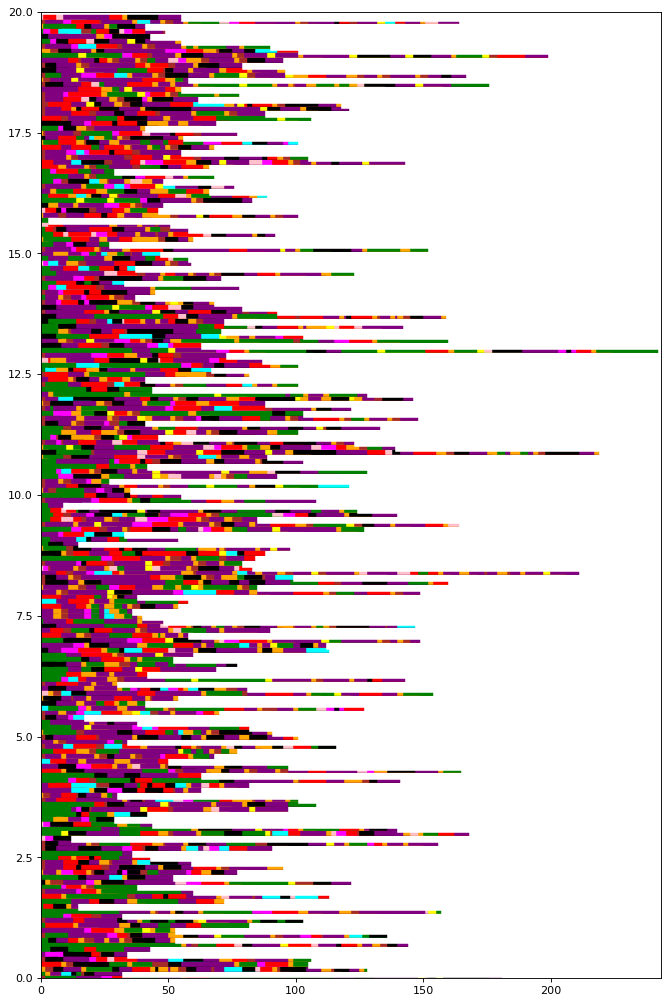

In [10]:
#visualization the gramatical parsing
from matplotlib.patches import Rectangle

max_x = 0
num_sentences = 200

#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 16), dpi=80)

for p in range(0, num_sentences):
    parsed = []
    parsed.extend([w for w in list(content[p]) if w.is_alpha])
    w_beg = 0
    w_end = 0
    
    for i in range(0, len(parsed)):
        #print(parsed[i].pos_)

        w_end = w_end + len(parsed[i])
        
        #update y axis max value
        if(w_end > max_x):
            max_x = w_end

        #assign each sentence word a color by type of word
        color = 'black'
        if(parsed[i].pos_ == "PRON"):
            color = 'pink'
        elif(parsed[i].pos_ == "VERB"):
            color = 'red'
        elif(parsed[i].pos_ == "CCONJ"):
            color = 'yellow'
        elif(parsed[i].pos_ == "PROPN"):
            color = 'green'
        elif(parsed[i].pos_ == "CCONJ"):
            color = 'blue'
        elif(parsed[i].pos_ == "AUX"):
            color = 'magenta'
        elif(parsed[i].pos_ == "ADV"):
            color = 'cyan'
        elif(parsed[i].pos_ == "DET"):
            color = 'brown'
        elif(parsed[i].pos_ == "NOUN"):
            color = 'purple'
        elif(parsed[i].pos_ == "ADP"):
            color = 'orange'
        #add rectangle to plot
        ax.add_patch(Rectangle((w_beg, (p*.1)), w_end, (p*.1)+.1, edgecolor = color,
                 facecolor = color,
                 fill=True,
                 lw=5))
        w_beg = w_end

    ax.add_patch(Rectangle((w_beg, (p*.1)-.04), 500, (p*.1)+.1, edgecolor = 'white',
             facecolor = 'white',
             fill=True,
             lw=5))

ax.add_patch(Rectangle((0, (p*.1)+.1), 500, 20, edgecolor = 'white',
         facecolor = 'white',
         fill=True,
         lw=5))

plt.xlim([0, max_x])
plt.ylim([0, num_sentences*.1])

#display plot
plt.show()

fig.savefig('vis.png', bbox_inches='tight', dpi=300)

In [11]:
#print random entities mentioned
for item in random.sample(entities, 10):
    print(item.text)

Finland
Ga.
EUR 7.2
TEX
Rapala
the same period a year ago
environmental sciences
2008
EUR 803.6 million
Frost


In [49]:
#example of processing further:
subjects = [chunk for chunk in entities if chunk.root.dep_ == 'nsubj']
objects = [chunk for chunk in entities if chunk.root.dep_ == 'dobj']

#print random entities mentioned
for item in random.sample(objects, 10):
    print(item.text)

500,000 tonnes
Dow Jones Newswires
11,000 tons
25 %
Motiva
10
a few days
the Stock Option Scheme 2008
Efore Plc
Scanfil EMS Group


In [12]:
#prepare data for machine learning

#encode sentiment metric column to integer

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col_0 = sentdata.Sentiment
set_col_0 = list(set(col_0))
le.fit(col_0)
dict(zip(set_col_0, le.transform(set_col_0)))

sentdata.Sentiment = le.transform(sentdata.Sentiment)

print(sentdata.Sentiment)

0       2
1       0
2       2
3       1
4       1
       ..
5837    0
5838    1
5839    1
5840    1
5841    2
Name: Sentiment, Length: 5842, dtype: int64


In [13]:
#encode the tweet to integer

col_1 = findata.Sentence
set_col_1 = list(set(col_1))
le.fit(col_1)
dict(zip(set_col_1, le.transform(set_col_1)))

findata.Sentence = le.transform(findata.Sentence)

print(findata.Sentence)

0       3684
1        135
2       1829
3        734
4       3744
        ... 
5837    3137
5838    2762
5839     670
5840    2169
5841    1928
Name: Sentence, Length: 5842, dtype: int64


In [24]:
count_positive = []

for p in range(0, len(content)):
    parsed = []
    parsed.extend([w for w in list(content[p]) if w.is_alpha])
    
    count = 0 
    
    for i in range(0, len(parsed)):    
        for j in range(0, len(positive_words)):
            if str(parsed[i]).lower() == positive_words[j].lower():
                count = count + 1

    count_positive.append(count)

findata.Positives = count_positive

print(findata.Positives)

[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
count_negative = []

for p in range(0, len(content)):
    parsed = []
    parsed.extend([w for w in list(content[p]) if w.is_alpha])
    
    count = 0
    
    for i in range(0, len(parsed)):        
        for j in range(0, len(negative_words)):
            if str(parsed[i]).lower() == negative_words[j].lower():
                count = count + 1              
    count_negative.append(count)

findata.Negatives = count_negative

print(findata.Negatives)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [14]:
#convert 2-D array to 1-D
sentimentresult = []

for i in range(0, len(sentdata.Sentiment)):
    sentimentresult.append(sentdata.Sentiment[i])
    
print(sentimentresult)

[2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 1, 

In [15]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(findata, sentimentresult, test_size=0.3) # 70% training and 30% test

n_samples, n_features = X_train.shape

#print training set shape
print(X_train.shape)

#print training set shape
print(X_test.shape)

(4089, 3)
(1753, 3)


In [16]:
print(X_test)

      Positives  Negatives  Sentence
2117          0          0      1718
5210          0          1      2236
1299          0          0      2077
613           0          0      2209
5332          0          0      4363
...         ...        ...       ...
5446          0          0      5220
1912          0          0       856
1394          0          0      4249
5475          1          0       384
5004          0          0      1569

[1753 rows x 3 columns]


In [17]:
print(y_train)

[1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 

In [18]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

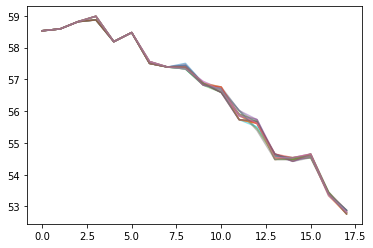

In [19]:
#Use a DecisionTreeClassifier machine algorithm with looping max_depth parameter

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

results = []
random_state = []
max_depth = []

for i in range(2, 20):
    for j in range(2, 20):
        DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=j,max_depth=i)
        DecisionTree.fit(X_train, y_train)
        predicted_values = DecisionTree.predict(X_test)
        x = metrics.accuracy_score(y_test, predicted_values)
        max_depth.append(x*100)
    results.append(max_depth)
    max_depth = []

import matplotlib.pyplot as plt

plt.plot(results, alpha=0.5)


In [20]:
#Use a DecisionTreeClassifier machine algorithm

# https://medium.com/swlh/decision-tree-classification-de64fc4d5aac

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test, predicted_values))

DecisionTrees's Accuracy is:  58.87050770108385
              precision    recall  f1-score   support

           0       0.50      0.04      0.08       258
           1       0.59      0.98      0.73       946
           2       0.63      0.17      0.27       549

    accuracy                           0.59      1753
   macro avg       0.57      0.40      0.36      1753
weighted avg       0.59      0.59      0.49      1753



In [21]:
#Use a GaussianNB machine learning algorithm

# https://iq.opengenus.org/gaussian-naive-bayes/

from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.5288077581289219
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.56      0.86      0.68       946
           2       0.39      0.20      0.26       549

    accuracy                           0.53      1753
   macro avg       0.31      0.35      0.31      1753
weighted avg       0.42      0.53      0.45      1753



/Users/ribells/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ribells/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ribells/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#Use a Support Vector Machine machine algorithm

# https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train, y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))

SVM's Accuracy is:  0.5681688533941814
              precision    recall  f1-score   support

           0       0.20      0.05      0.08       258
           1       0.60      0.83      0.70       946
           2       0.51      0.36      0.42       549

    accuracy                           0.57      1753
   macro avg       0.44      0.41      0.40      1753
weighted avg       0.51      0.57      0.52      1753



In [23]:
#Use a Logistic Regression machine learning algorithm

# https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train, y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))

Logistic Regression's Accuracy is:  0.5396463205932687
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       258
           1       0.54      1.00      0.70       946
           2       0.00      0.00      0.00       549

    accuracy                           0.54      1753
   macro avg       0.18      0.33      0.23      1753
weighted avg       0.29      0.54      0.38      1753



/Users/ribells/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ribells/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ribells/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.4945807187678266, 0.4900171135196805, 0.5014261266400456, 0.49629207073588133, 0.5059897318881916, 0.5037079292641187, 0.5145464917284654, 0.5059897318881916, 0.5071306332002282, 0.5077010838562465, 0.511123787792356, 0.4997147746719909, 0.5008556759840274, 0.5042783799201369, 0.5059897318881916, 0.5019965772960638, 0.5037079292641187, 0.49857387335995434]


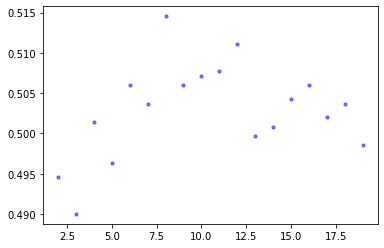

In [26]:
#Use a RandomForestClassifier machine algorithm with looping n_estimators parameter

from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

results = []
random_state = []

for i in range(2, 20):
    random_state.append(i)
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=i, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
    clf.fit(X_train, y_train)
    predicted_values = clf.predict(X_test)
    x = metrics.accuracy_score(y_test, predicted_values)
    results.append(x)

import matplotlib.pyplot as plt 

plt.scatter(random_state, results, s=10, c='b', alpha=0.5)
print(results)

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

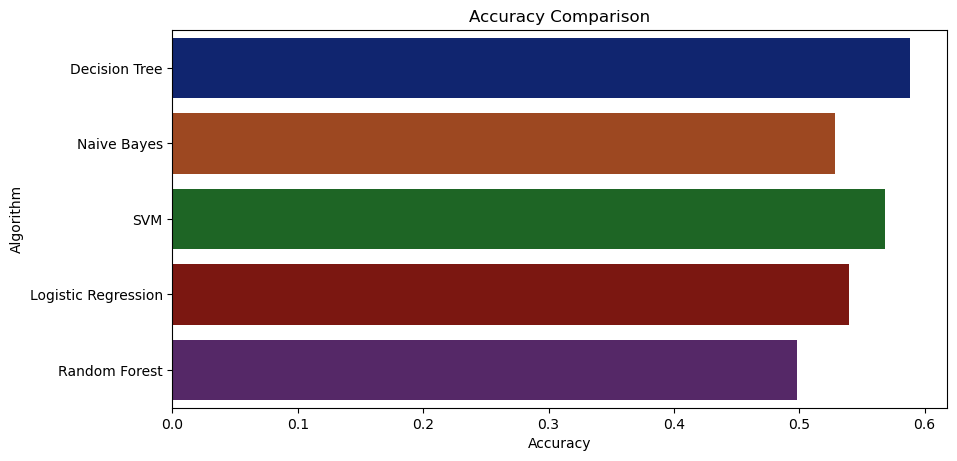

In [32]:
#show an accuracy comparison

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [35]:
#Make a prediction on new cases

import numpy as np

data = np.array([[0, 1, len(tweets)]]) #adds a new integer for new tweet (whatever it is)
prediction = clf.predict(data)
print(prediction)

[1]
